In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [6]:
#Read the csv file
df = pd.read_csv("retailsales.csv")
print(df)

     Transaction ID        Date Customer ID  Gender  Age Product Category  \
0                 1  2023-11-24     CUST001    Male   34           Beauty   
1                 2  2023-02-27     CUST002  Female   26         Clothing   
2                 3  2023-01-13     CUST003    Male   50      Electronics   
3                 4  2023-05-21     CUST004    Male   37         Clothing   
4                 5  2023-05-06     CUST005    Male   30           Beauty   
..              ...         ...         ...     ...  ...              ...   
995             996  2023-05-16     CUST996    Male   62         Clothing   
996             997  2023-11-17     CUST997    Male   52           Beauty   
997             998  2023-10-29     CUST998  Female   23           Beauty   
998             999  2023-12-05     CUST999  Female   36      Electronics   
999            1000  2023-04-12    CUST1000    Male   47      Electronics   

     Quantity  Price per Unit  Total Amount  
0           3              50

In [9]:
#Display the first few rows
print(df.head())

   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


In [11]:
#Dislay of the basic information about the dataset
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
None
       Transaction ID         Age     Quantity  Price per Unit  Total Amount
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
mean       500.500000    41.39200     2.514000      179.890000    456.000000
std        288.819436    13.68143     1.132734      189.681356    559.997632
min          1.000000    

In [9]:
#Top 5 selling products
top_5_products = df.groupby('Product Category')['Quantity'].sum().sort_values(ascending=False).head()
print("Top 5 Selling Product Categories:")
print(top_5_products)

Top 5 Selling Product Categories:
Product Category
Clothing       894
Electronics    849
Beauty         771
Name: Quantity, dtype: int64


In [11]:
#Correlation between Age and Total Amount
correlation = df['Age'].corr(df['Total Amount'])
print(f"\
Correlation between Age and Total Amount: {correlation:.2f}")

Correlation between Age and Total Amount: -0.06


In [13]:
# Descriptive Statistics
mean_values = df.mean(numeric_only=True)
median_values = df.median(numeric_only=True)
mode_values = df.mode().iloc[0]
std_dev_values = df.std(numeric_only=True)
print("Descriptive Statistics:")
print("Mean:")
print(mean_values)
print("\
Median:")
print(median_values)
print("\
Mode:")
print(mode_values)
print("\
Standard Deviation:")
print(std_dev_values)

Descriptive Statistics:
Mean:
Transaction ID    500.500
Age                41.392
Quantity            2.514
Price per Unit    179.890
Total Amount      456.000
dtype: float64
Median:
Transaction ID    500.5
Age                42.0
Quantity            3.0
Price per Unit     50.0
Total Amount      135.0
dtype: float64
Mode:
Transaction ID               1
Date                2023-05-16
Customer ID            CUST001
Gender                  Female
Age                       43.0
Product Category      Clothing
Quantity                   4.0
Price per Unit            50.0
Total Amount              50.0
Name: 0, dtype: object
Standard Deviation:
Transaction ID    288.819436
Age                13.681430
Quantity            1.132734
Price per Unit    189.681356
Total Amount      559.997632
dtype: float64


In [41]:
# Time Series Analysis
# Convert 'Date' column to datetime if it's not already
df['Date'] = pd.to_datetime(df['Date'])
monthly_sales = df.resample('ME', on='Date')['Total Amount'].sum()
print("\
Monthly Sales:")
print(monthly_sales)

Monthly Sales:
Date
2023-01-31    35450
2023-02-28    44060
2023-03-31    28990
2023-04-30    33870
2023-05-31    53150
2023-06-30    36715
2023-07-31    35465
2023-08-31    36960
2023-09-30    23620
2023-10-31    46580
2023-11-30    34920
2023-12-31    44690
2024-01-31     1530
Freq: ME, Name: Total Amount, dtype: int64


In [27]:
customer_demographics = df.groupby('Gender')['Age'].describe()
product_sales = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)
print("\
Customer Demographics:")
print(customer_demographics)
print("\
Product Sales:")
print(product_sales)

Customer Demographics:
        count       mean        std   min   25%   50%    75%   max
Gender                                                            
Female  510.0  41.356863  13.568067  18.0  29.0  42.0  52.75  64.0
Male    490.0  41.428571  13.812208  18.0  30.0  42.0  54.00  64.0
Product Sales:
Product Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: Total Amount, dtype: int64


In [ ]:
#Gender Distribution of Customers: This pie chart illustrates the gender distribution among customers.

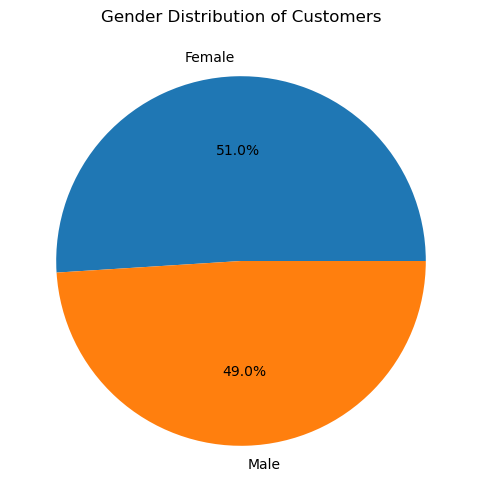

In [39]:
#Gender Distribution
gender_distribution = df['Gender'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(gender_distribution.values, labels=gender_distribution.index, autopct='%1.1f%%')
plt.title('Gender Distribution of Customers')
plt.show()

In [ ]:
#Age Distribution by Gender: This stacked histogram displays the age distribution for male and female customers, allowing us to compare age demographics between genders.

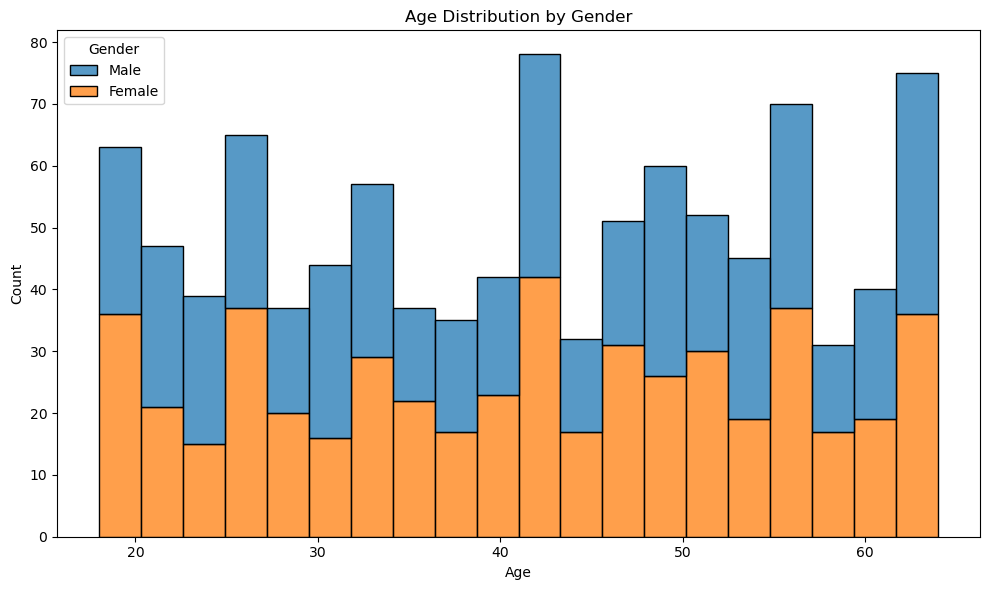

<Figure size 640x480 with 0 Axes>

In [33]:
#Age Distribution by Gender
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Gender', multiple='stack', bins=20)
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()
plt.savefig("hist.png")

In [ ]:
#Customer Age Distribution: This histogram displays the age distribution of customers, indicating the most common age groups.

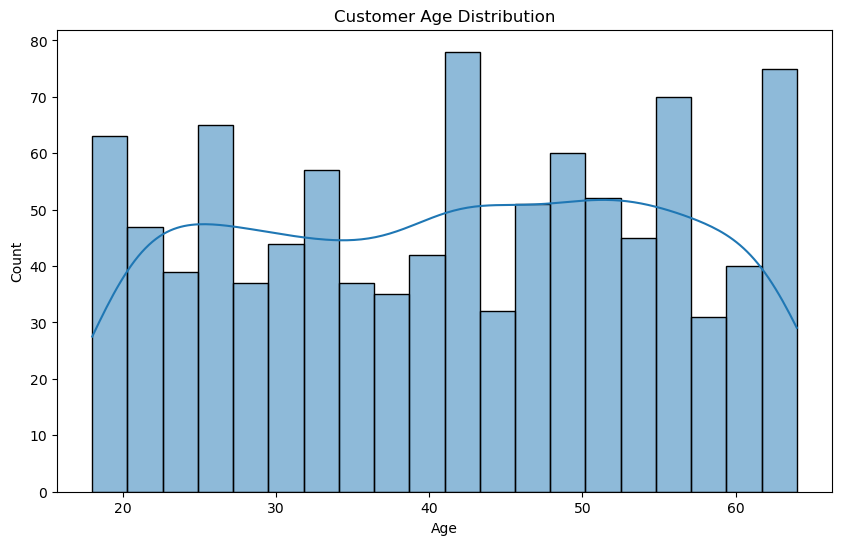

In [47]:
#Customer Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [ ]:
#Product Category Distribution: A bar plot shows the number of sales for each product category, giving us an idea of which categories are most popular.

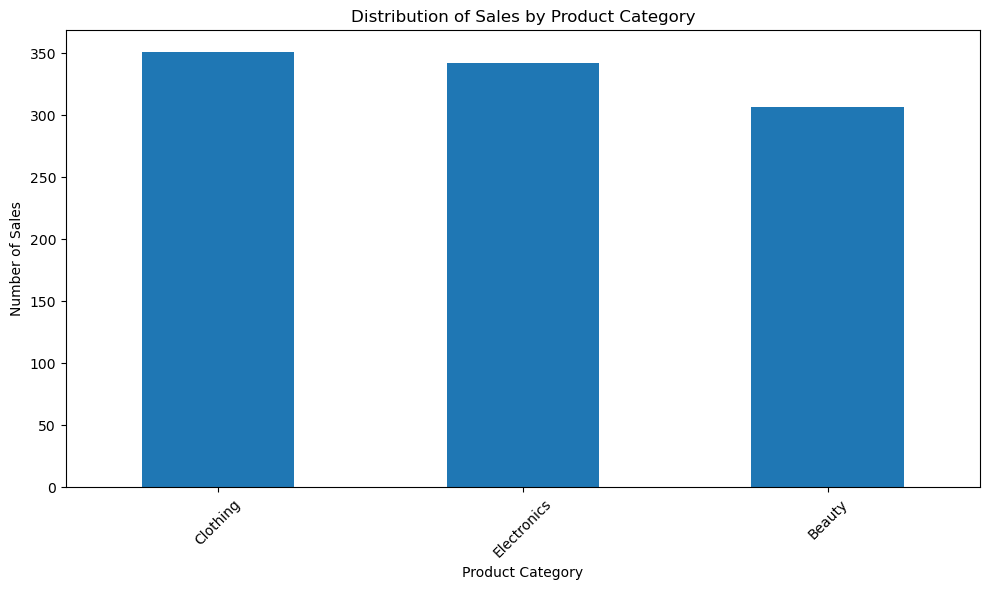

In [63]:
#Product Category Distribution
plt.figure(figsize=(10, 6))
df['Product Category'].value_counts().plot(kind='bar')
plt.title('Distribution of Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#Total Sales by Product Category: This bar chart shows the distribution of total sales across different product categories.

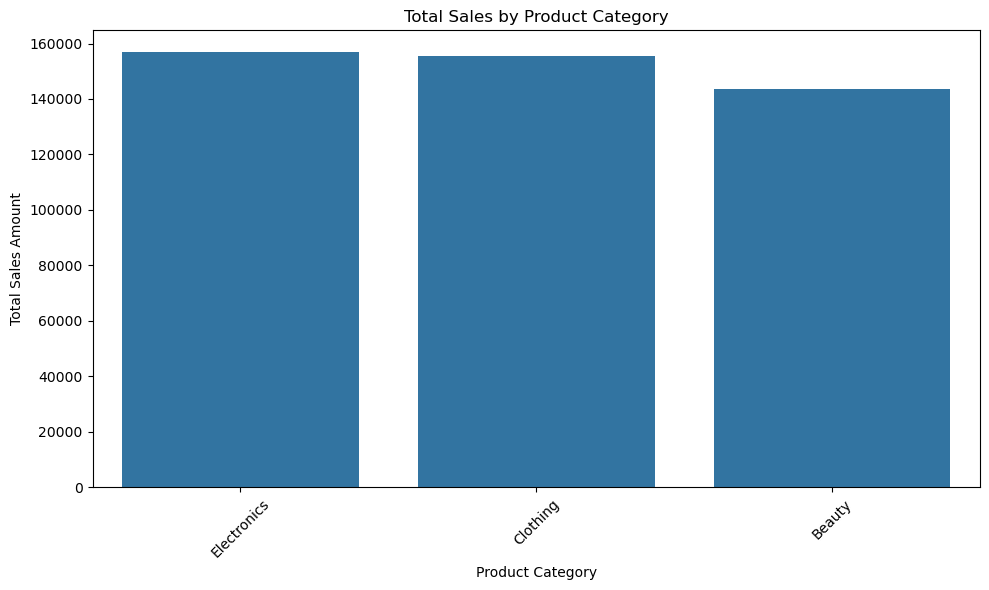

In [49]:
#Sales by Product Category
sales_by_category = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_category.index, y=sales_by_category.values)
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#Daily Sales Trend: This line plot shows the trend of daily sales over time.

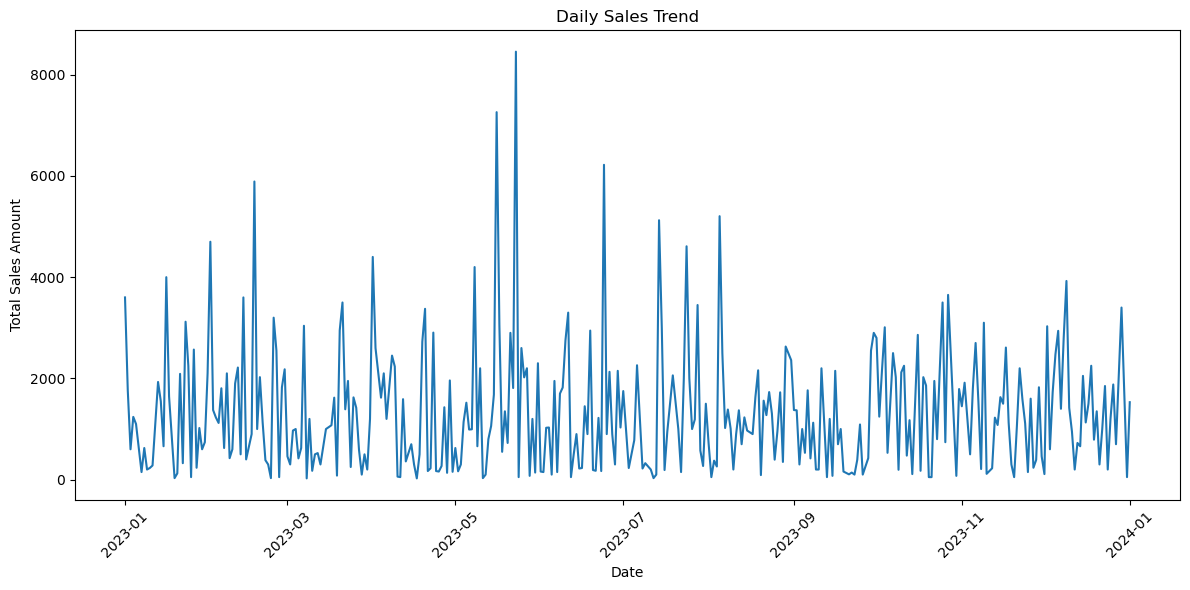

In [51]:
#Sales Trend Over Time
df['Date'] = pd.to_datetime(df['Date'])
daily_sales = df.groupby('Date')['Total Amount'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Date'], daily_sales['Total Amount'])
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

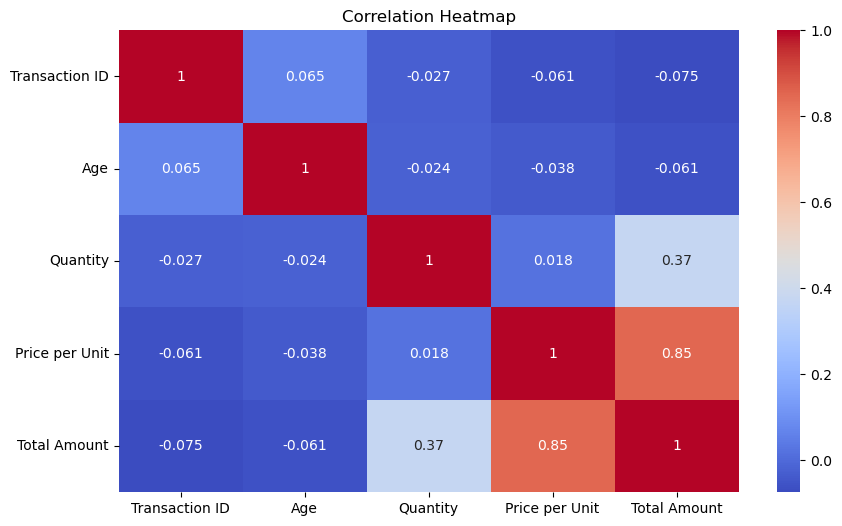

In [55]:
# Exclude non-numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])
# Visualization: Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#Monthly Sales Trend: We used a line plot to show the total sales amount for each month. This helps visualize seasonal trends in sales.

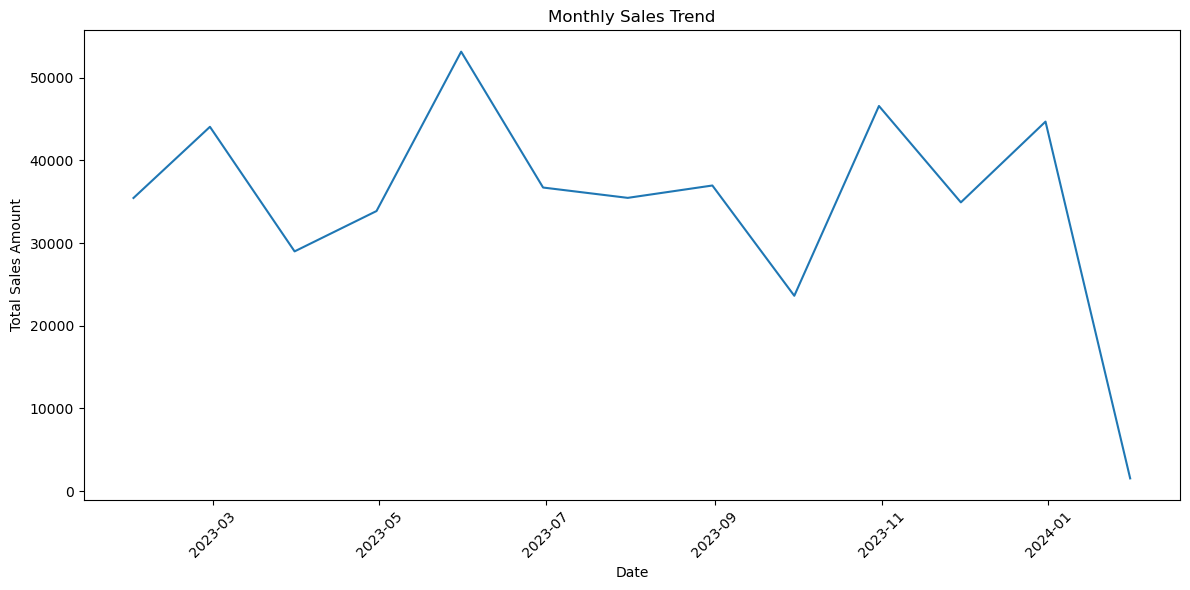

In [57]:
#Monthly Sales Trend
plt.figure(figsize=(12, 6))
monthly_sales = df.resample('ME', on='Date')['Total Amount'].sum()
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#Quantity vs Total Amount: A scatter plot shows the relationship between the quantity of items purchased and the total amount spent, with different colors for each product category.

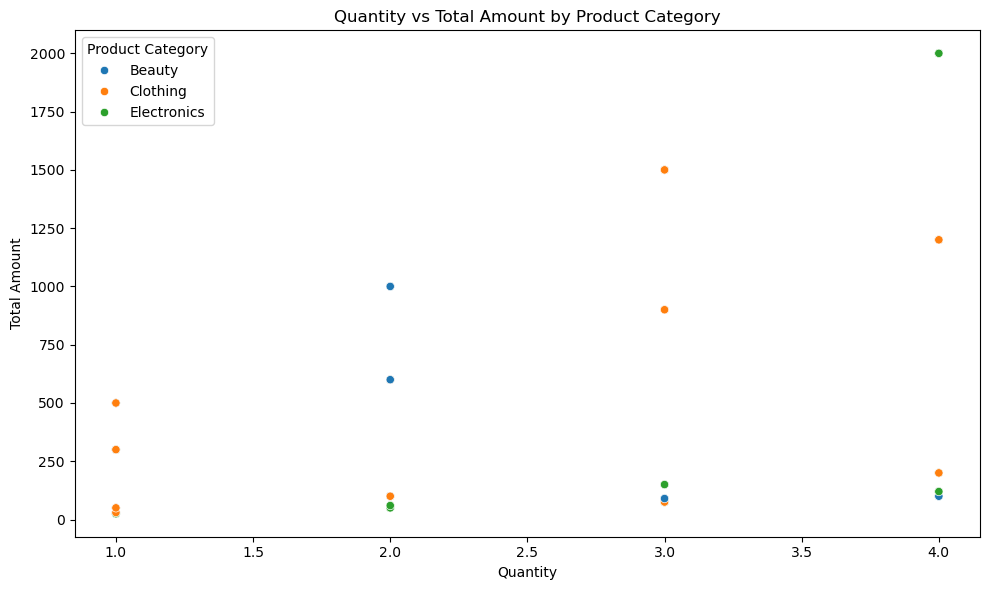

In [59]:
#Scatter plot of Quantity vs Total Amount
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Quantity', y='Total Amount', hue='Product Category')
plt.title('Quantity vs Total Amount by Product Category')
plt.xlabel('Quantity')
plt.ylabel('Total Amount')
plt.tight_layout()
plt.show()

In [ ]:
#Total Amount Distribution by Product Category: Box plots display the distribution of total amounts spent in each product category, showing median, quartiles, and outliers.

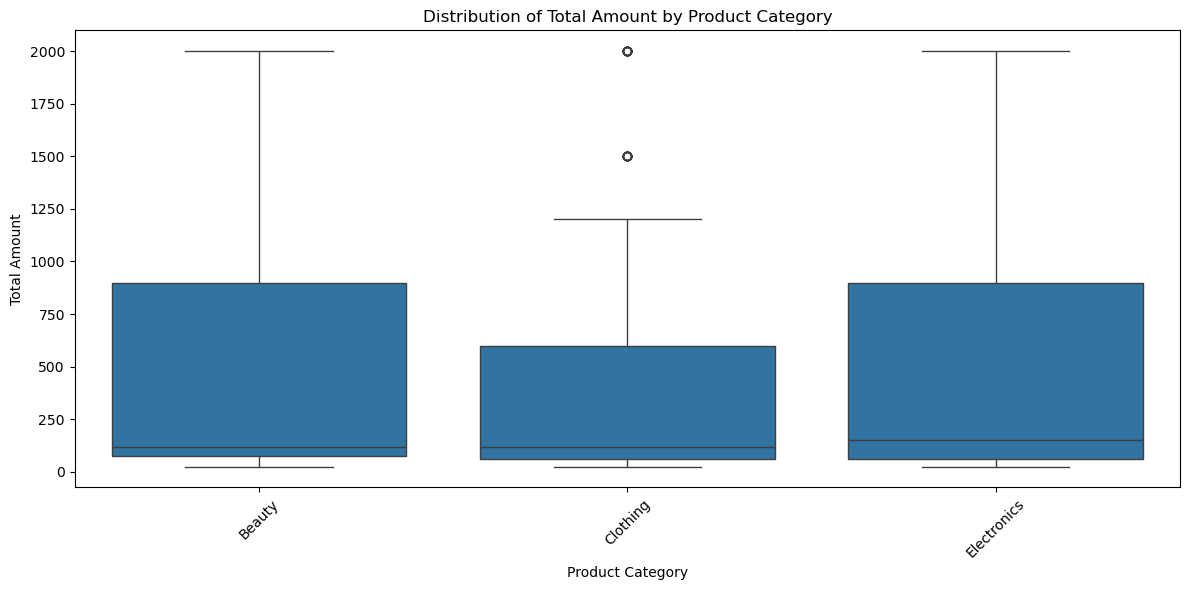

In [61]:
#Box plot of Total Amount by Product Category
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Product Category', y='Total Amount')
plt.title('Distribution of Total Amount by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [37]:
#The exploratory data analysis (EDA) of the retail sales dataset revealed no missing values or duplicates, and the data types are appropriate,
#indicating a clean dataset. The monthly sales trends, product category distribution, and demographic insights were successfully visualized,
#providing a comprehensive understanding of sales patterns, customer demographics, and product performance. Here are the insights:

#1. Monthly Sales Trends: The dataset shows consistent sales trends over the months, with some fluctuations indicating potential seasonal effects.

#2. Product Category Distribution: Certain product categories dominate sales, suggesting popular items that drive revenue.

#3. Demographic Insights: The age distribution by gender provides insights into the customer base, helping tailor marketing strategies.

#4. Quantity vs. Total Amount: The relationship between quantity purchased and total amount spent highlights purchasing behavior.

#5. Total Amount Distribution by Product Category: Box plots reveal the spread and outliers in spending across different product categories.